# Portuguese School Data Analysis

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

In [1]:
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

porData = pd.read_csv("student-por.csv")
matData = pd.read_csv("student-mat.csv")

#  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
#  Modeling wine preferences by data mining from physicochemical properties.
#  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.
print("Portuguese Data")
display(porData.head())
print("Math Data")
display(matData.head())

Portuguese Data


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


Math Data


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


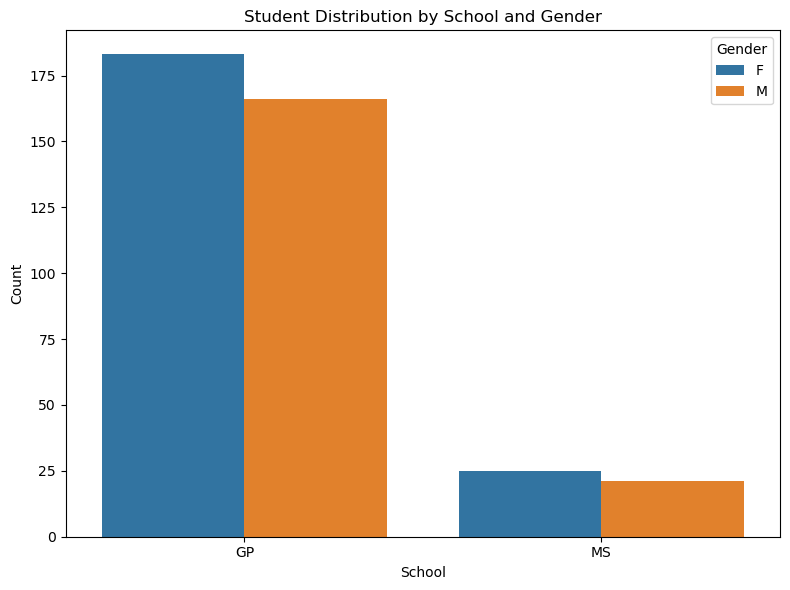

In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("student-mat.csv")

# ---------------------------------------------
# Visualization 1: Count plot of students by school and sex
# ---------------------------------------------
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="school", hue="sex")
plt.title("Student Distribution by School and Gender")
plt.xlabel("School")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.tight_layout()
plt.savefig("JackSchenck_StudentDistributionBySchoolAndGender.png")
plt.show()

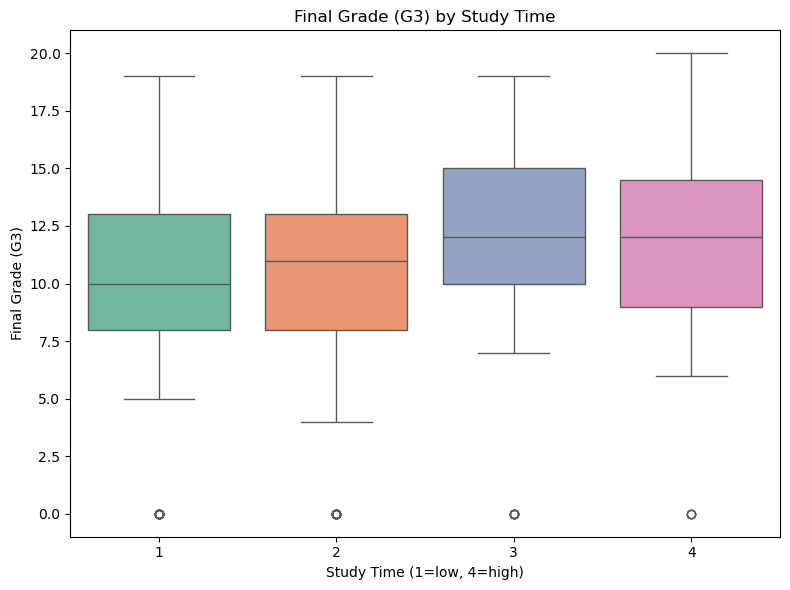

In [3]:
# ---------------------------------------------
# Visualization 2: Boxplot of final grade (G3) by study time
# ---------------------------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="studytime", y="G3", palette="Set2")
plt.title("Final Grade (G3) by Study Time")
plt.xlabel("Study Time (1=low, 4=high)")
plt.ylabel("Final Grade (G3)")
plt.tight_layout()
plt.savefig("JackSchenck_FinalGradeByStudyTime.png")
plt.show()

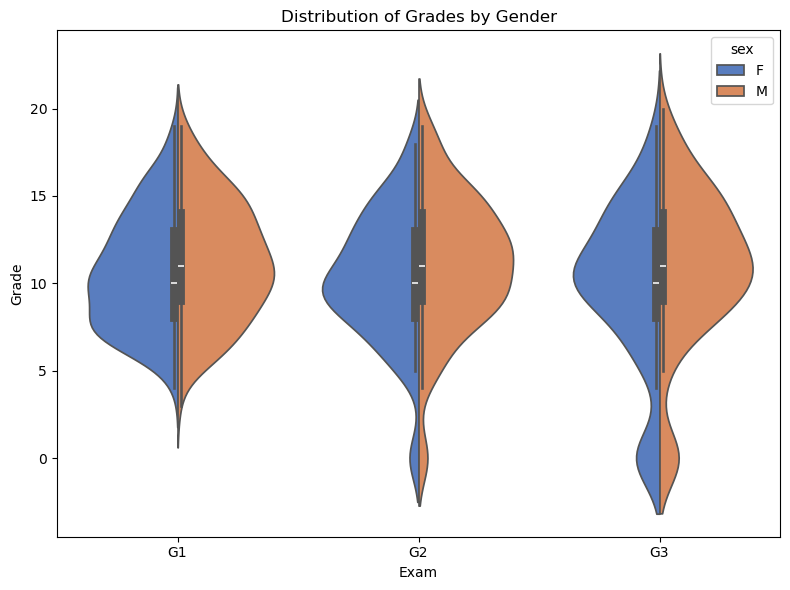

In [4]:
# ---------------------------------------------
# Visualization 3: Violin plot of grades (G1, G2, G3) by gender
# ---------------------------------------------
melted = df.melt(id_vars="sex", value_vars=["G1", "G2", "G3"], var_name="Exam", value_name="Grade")
plt.figure(figsize=(8, 6))
sns.violinplot(data=melted, x="Exam", y="Grade", hue="sex", split=True, palette="muted")
plt.title("Distribution of Grades by Gender")
plt.tight_layout()
plt.savefig("JackSchenck_GradeDistributionByGender.png")
plt.show()

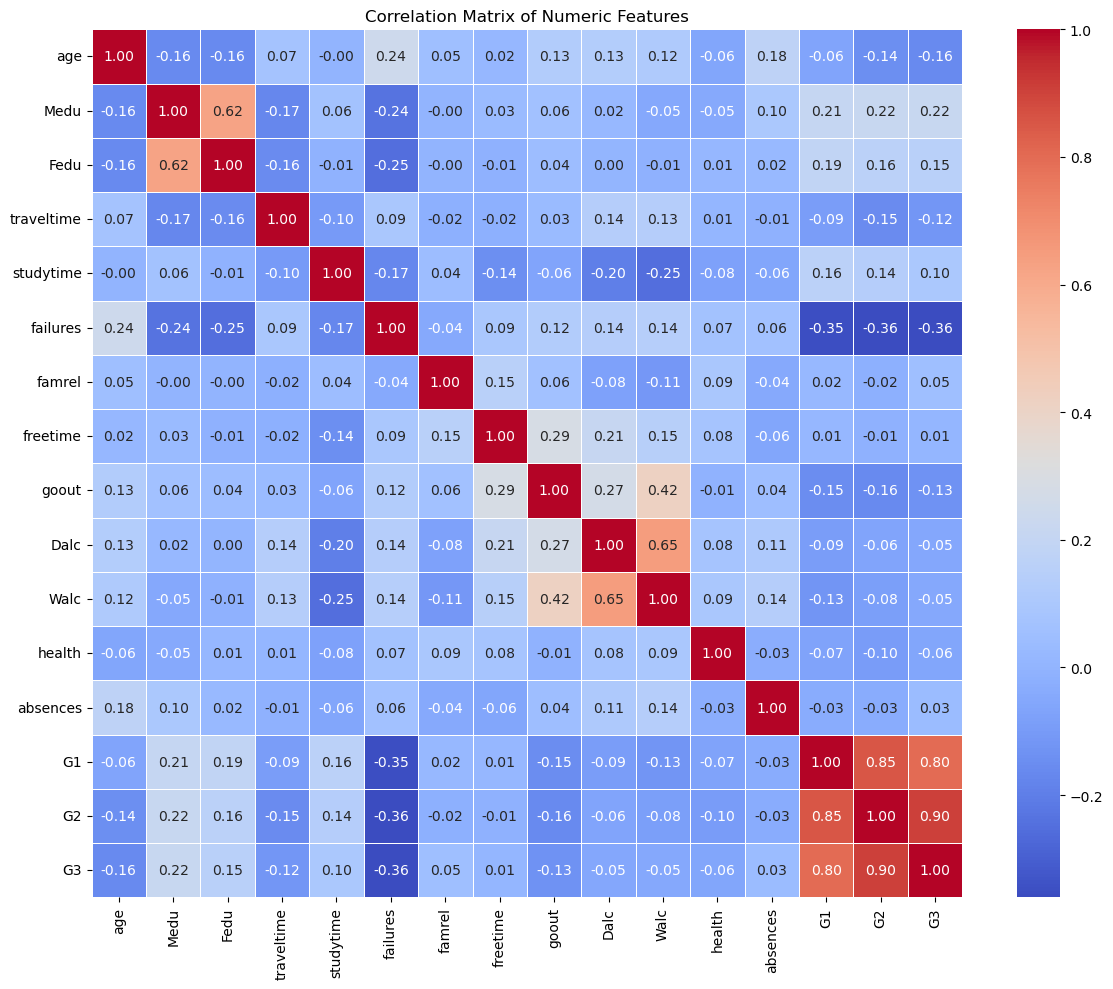

In [5]:
# ---------------------------------------------
# Visualization 4: Heatmap of correlations among numeric features
# ---------------------------------------------
plt.figure(figsize=(12, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.savefig("JackSchenck_CorrelationMatrix.png")
plt.show()

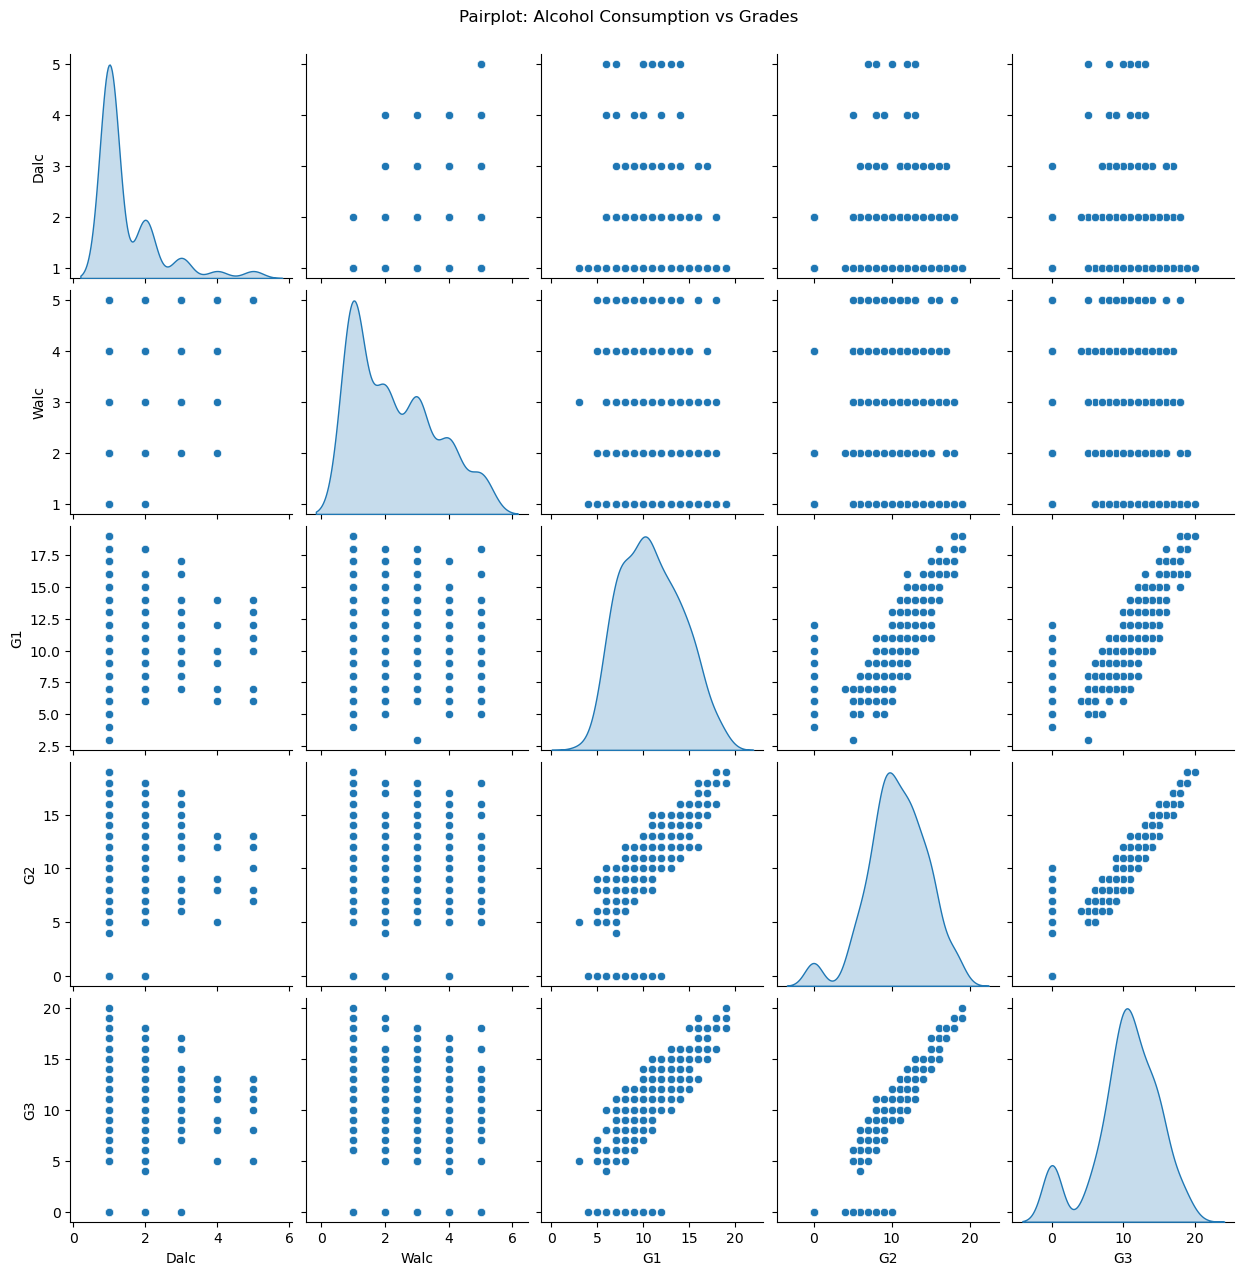

In [6]:
# ---------------------------------------------
# Visualization 5: Pairplot of alcohol consumption vs grades
# ---------------------------------------------
selected = df[["Dalc", "Walc", "G1", "G2", "G3"]]
sns.pairplot(selected, diag_kind="kde")
plt.suptitle("Pairplot: Alcohol Consumption vs Grades", y=1.02)
plt.savefig("JackSchenck_AlcoholVsGrades.png")
plt.show()